We **compare adaptive quadrature routines** from **quadpy** and **scipy**

In [216]:
def calc(qp):
    '''Calculates \int_T e^{-i|x-qp|}/|x-qp| dx

       triangle T format: [[0,0],[1,0],[0,1]]
       quad point format: [u,v]'''
    import quadpy, numpy
    triangle = [[0.0, 0.0], [1.0, 0.0], [0.0,1.0]]
    def f(x):
        normR = numpy.power(numpy.power(qp[0] - x[0],2) + \
                            numpy.power(qp[1] - x[1],2),0.5)
        return numpy.exp(-normR)/normR

    val, err = quadpy.triangle.integrate_adaptive(f,triangle,\
                                                  1.0E0,\
                                                  1.0E-20
                                                 ) 

    print 'val =',str(val)+'\n'+'err =',err

In [217]:
calc([5.0/6,1.0/6])

val = 1.2169715842075504
err = 0.2522063304444532


In [199]:
help(calc)

Help on function calc in module __main__:

calc(qp)
    Calculates \int_T e^{-i|x-qp|}/|x-qp| dx
    
    triangle T format: [[a,b],[c,d],[e,f]]
    quad point format: [u,v]



In [189]:
from scipy import integrate
qp = [1.0/3,1.0/3]
f = lambda y, x: numpy.exp(-numpy.power(numpy.power(x-qp[0],2)+numpy.power(y-qp[1],2),0.5))/\
                 numpy.power(numpy.power(x-1./3,2)+numpy.power(y-1./3,2),0.5)
integrate.dblquad(f, 0, 1, lambda x: 0, lambda x: 1-x,epsabs=1.0e-16, epsrel=1.0e-12)

(1.9742278134001718, 8.681529589256029e-12)

In [214]:
def scipyquad(qp):
    from scipy import integrate
    
    f = lambda y, x: numpy.exp(-numpy.power(numpy.power(x-qp[0],2)+numpy.power(y-qp[1],2),0.5))/\
                     numpy.power(numpy.power(x-1./3,2)+numpy.power(y-1./3,2),0.5)
    val, err = integrate.dblquad(f, 0, 1, lambda x: 0, lambda x: 1-x,epsabs=1.0e-16, epsrel=1.0e-12)
    
    print 'val =',str(val)+'\n'+'err =',err,'\n'

In [215]:
scipyquad([1.0/6,1.0/6])
scipyquad([5.0/6,1.0/6])
scipyquad([1.0/6,5.0/6])

val = 1.79301850869
err = 1.6056836483e-11 

val = 1.4096869406
err = 1.16351283616e-11 

val = 1.4096869406
err = 1.15698177034e-11 



Function definitions

In [35]:
import numpy, scipy

betaReal = 1.0
betaImag = 1.0
beta = betaReal + 1j*betaImag

#============================#
#  Green's function G(r,r')  #
#============================#

# equation 5
def Greal_weaklysingular(x,y,beta):
    R = numpy.power(numpy.linalg.norm(numpy.array(x)-numpy.array(y)),0.5)
    return numpy.cos(scipy.real(beta))*numpy.exp(betaImag*R)/(4.0*numpy.pi*R)

# equation 7
def jGimag_regular(x,y,beta):
    R = numpy.power(numpy.linalg.norm(numpy.array(x)-numpy.array(y)),0.5)
    return -1j*numpy.sin(scipy.real(beta))*numpy.exp(betaImag*R)/(4.0*numpy.pi*R)

# equation 3 = equation 5 + equation 7
def G(x,y):
    return Greal_weaklysingular(x,y) + 1j*Gimag_regular(x,y)

#=======================================#
#  Gradient of Green's function wrt r'  #
#=======================================#

# equation 6
def gradG_regular(x,y,beta):
    R = numpy.power(numpy.linalg.norm(numpy.array(x)-numpy.array(y)),0.5)    
    betaReal = numpy.real(beta)
    betaImag = numpy.imag(beta)
    return (numpy.array(y)-numpy.array(x))/numpy.power(R,2)*\
            numpy.exp(betaImag*R)/(4*numpy.pi)*\
            (-betaReal*numpy.sin(betaReal*R)-\
                1j*betaImag*numpy.sin(betaImag*R))
    
# equation 8
def gradG_weaklysingular(x,y,beta):
    R = numpy.power(numpy.linalg.norm(numpy.array(x)-numpy.array(y)),0.5)    
    betaReal = numpy.real(beta)
    betaImag = numpy.imag(beta)
    return (numpy.array(y)-numpy.array(x))/numpy.power(R,2)*\
            numpy.exp(betaImag*R)/(4*numpy.pi)*\
            (betaImag*numpy.cos(betaReal*R)-\
                1j*(betaImag*numpy.cos(betaReal*R)-numpy.sin(betaReal*R)/R))

# equation 8
def gradG_stronglysingular(x,y,beta):
    betaReal = numpy.real(beta)
    betaImag = numpy.imag(beta)
    R = numpy.power(numpy.linalg.norm(numpy.array(x)-numpy.array(y)),0.5)    
    return -(numpy.array(y)-numpy.array(x))/numpy.power(R,3)*\
            numpy.exp(betaImag*R)/(4*numpy.pi)*numpy.cos(betaReal*R)

# equation 4
def gradG(x,y,beta):
    return gradG_regular(x,y,beta)+\
            gradG_weaklysingular(x,y,beta)+\
            gradG_stronglysingular(x,y,beta)

## $\S 3.1$ Regular Integration

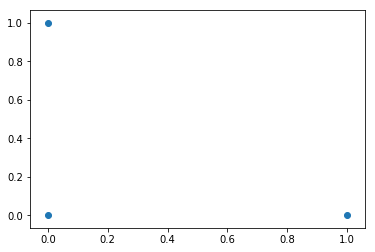

In [36]:
import matplotlib.pyplot as plt
plt.scatter([0,1,0],[0,0,1])
plt.show()

## $\S 3.2$ Weakly Singular Integration
We assume the singular point is $P=(p,q,r)$ and the domain of integration is the flat triangle $T$.

#### $\S 3.2.1$ Transform to Polar Coordinates
The differential area element transforms as
$$\begin{align}
x = r \cos(\theta) \Rightarrow dx &= \cos(\theta) dr - r \sin(\theta) d\theta \\
y = r \sin(\theta) \Rightarrow dy &= \sin(\theta) dr + r \cos(\theta) d\theta \\
\therefore dx\wedge dy &= r [\cos^2(\theta) + \sin^2(\theta)] dr\wedge d\theta
\end{align}$$

The limits of integration $x=0$ to $x=1$ and $y=0$ to $y=1-x$ are readily transformed into integration from $\theta=0$ to $\theta=\pi/2$ and from $r=0$ to $r(\theta)$. We determine $r(\theta)$ in the following:
$$\begin{align}
y(r,\theta) &= 1-x(r,\theta) \\
\Rightarrow r \sin(\theta) &= 1-r \cos(\theta) \\
\therefore r &= \frac{1}{\cos(\theta)+\sin(\theta)}
\end{align}$$

The integral involving the weakly singular kernel
$$\int_{x=0}^{x=1} \int_{y=0}^{y=1-x}
 \nabla _{y} G(x,y,\beta) \Lambda(y) dy$$
becomes, in the notation of our notebook, 
$$\int_{x=0}^{x=1} \int_{y=0}^{y=1-x}  \mbox{Gimag_regular(x,y,beta) $\cdot$ bf(x,y)} dy \, dx$$
Under the polar change of variables, this becomes
$$ \int_{\theta=0}^{\theta=\pi/2} \int_{r=0}^{r=1/(\cos(\theta)+\sin(\theta))} \mbox{RGimag_regular}(r \cos(\theta),r \sin(\theta)) \cdot \mbox{bf}(r \cos(\theta), r \sin(\theta))
\,dr \,d\theta$$
where we have defined a new function
$$ \mbox{RGimag_regular(x,y,beta) = R(x,y)} \cdot \mbox{Gimag_regular(x,y,beta)}$$

In [49]:
bf = lambda (x) : numpy.array([x[0],x[1],0.0]) 



# regularized equation 7, but without a factor of i for numpy reasons
def RGimag_regular(x,y,beta):
    R = numpy.power(numpy.linalg.norm(numpy.array(x)-numpy.array(y)),0.5)
    return -numpy.sin(scipy.real(beta))*numpy.exp(betaImag*R)/(4.0*numpy.pi)

from scipy import integrate
f = lambda r, theta: 1*\
    RGimag_regular(r*numpy.cos(theta),r*numpy.sin(theta),beta)
integrate.dblquad(f, 0, numpy.pi/2.0, \
    lambda theta: 0, lambda theta: 1.0/(numpy.cos(theta)+numpy.sin(theta)),\
                  epsabs=1.0e-16, epsrel=1.0e-12)

(-0.13152643564767577, 2.040118074475572e-12)

In [ ]:
# regularized equation 8
def RgradG_weaklysingular(x,y,beta):
    R = numpy.power(numpy.linalg.norm(numpy.array(x)-numpy.array(y)),0.5)    
    betaReal = numpy.real(beta)
    betaImag = numpy.imag(beta)
    return (numpy.array(y)-numpy.array(x))/R*\
            numpy.exp(betaImag*R)/(4*numpy.pi)*\
            (betaImag*numpy.cos(betaReal*R)-\
                1j*(betaImag*numpy.cos(betaReal*R)-numpy.sin(betaReal*R)/R))



#### $\S 3.2.2$ Domain Transform

#### $\S 3.2.1$ Singularity Extraction

## $\S 3.3$ Strongly Singular Integration

#### $\S 3.3.1$ Transform to Polar Coordinates and Extraction of Singularity

#### $\S 3.3.2$ Domain transform and extraction of singularity

## $\S 3.4$ Nearly Singular Integration